<a href="https://colab.research.google.com/github/azulito26/AsoLibre/blob/main/AsoLibre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Chat

## Paquetes

In [40]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Importar datos

In [52]:
# Cargar el archivo de chat
file_path = '/content/_chat-2.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    chat_content = file.readlines()

# Extraer mensajes del chat
messages = []
for line in chat_content:
    # Usar una expresión regular para identificar líneas con mensajes
    match = re.match(r'\[.*?\] (.*?): (.*)', line)
    if match:
        author = match.group(1)
        message = match.group(2)
        messages.append({'author': author, 'message': message})

# Convertir en DataFrame
df = pd.DataFrame(messages)

# Ánalisis

In [53]:
# Realizar el análisis de sentimientos usando TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity  # -1 a 1
    if sentiment > 0:
        return "positivo"
    elif sentiment < 0:
        return "negativo"
    else:
        return "neutro"

df['sentiment'] = df['message'].apply(analyze_sentiment)

# Contar la cantidad de mensajes por sentimiento
sentiment_count = df['sentiment'].value_counts()

# Mostrar el resumen de sentimientos
sentiment_count

,count
sentiment,
neutro,76952
positivo,2251
negativo,850


## Participación

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127796 (\N{PALM TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128509 (\N{STATUE OF LIBERTY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

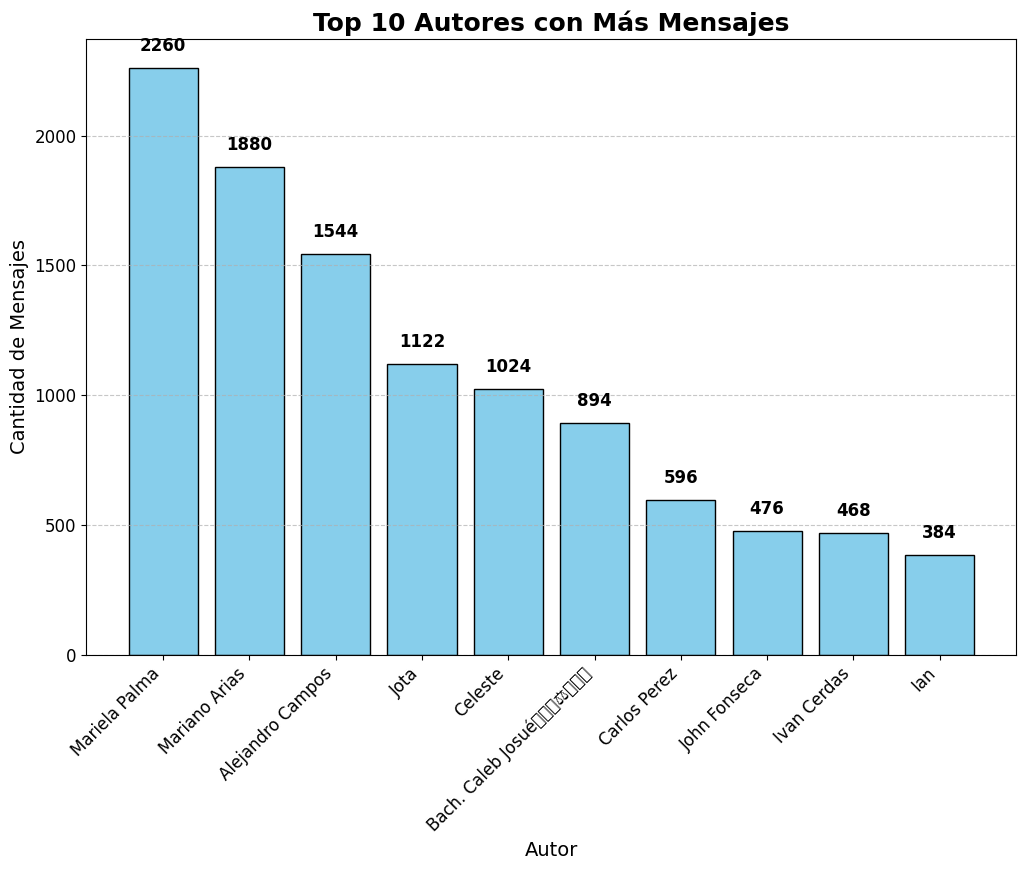

In [54]:
# Mejorar el gráfico de barras con detalles adicionales y ajuste de etiquetas
plt.figure(figsize=(12, 8))
bars = plt.bar(author_counts.index, author_counts.values, color='skyblue', edgecolor='black')

# Agregar título y etiquetas con estilo
plt.title("Top 10 Autores con Más Mensajes", fontsize=18, fontweight='bold')
plt.xlabel("Autor", fontsize=14)
plt.ylabel("Cantidad de Mensajes", fontsize=14)

# Ajustar las etiquetas de los autores para que queden bien centradas
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar los valores encima de cada barra con un pequeño desplazamiento hacia arriba
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, str(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Estética adicional
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico mejorado
plt.show()



## Análisis de Sentimientos

### Limpieza de datos


In [55]:
# Verificar la estructura actual del DataFrame
df.info()

# Mostrar algunas filas del DataFrame para ver el contenido actual
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80053 entries, 0 to 80052
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     80053 non-null  object
 1   message    80053 non-null  object
 2   sentiment  80053 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


,author,message,sentiment
0,Asociación Libre - Oficial,‎Messages and calls are end-to-end encrypted. ...,neutro
1,Mariela Palma,‎Mariela Palma created this group,neutro
2,Asociación Libre - Oficial,‎Mariela Palma added you,neutro
3,Sebastian,"Ah suave, grupo equivocado",neutro
4,Carlos Perez Libre,‎Mariela Palma added Carlos Perez Libre,neutro


In [66]:
# Reconstruir la lista de stopwords en español
spanish_stopwords_nltk = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o',
    'fue', 'este', 'ha', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre',
    'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante',
    'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e',
    'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él',
    'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella',
    'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu',
    'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías',
    'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra',
    'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas',
    'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos',
    'estéis', 'estén', 'estaré', 'estarás', 'estará', 'estaremos', 'estaréis', 'estarán',
    'estaría', 'estarías', 'estaríamos', 'estaríais', 'estarían', 'estaba', 'estabas',
    'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo', 'estuvimos',
    'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 'estuvierais',
    'estuvieran', 'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 'estuviesen',
    'estando', 'estado', 'estada', 'estados', 'estadas', 'estad', 'he', 'has', 'ha',
    'hemos', 'habéis', 'han', 'haya', 'hayas', 'hayamos', 'hayáis', 'hayan', 'habré',
    'habrás', 'habrá', 'habremos', 'habréis', 'habrán', 'habría', 'habrías', 'habríamos',
    'habríais', 'habrían', 'había', 'habías', 'habíamos', 'habíais', 'habían', 'hube',
    'hubiste', 'hubo', 'hubimos', 'hubisteis', 'hubieron', 'hubiera', 'hubieras',
    'hubiéramos', 'hubierais', 'hubieran', 'hubiese', 'hubieses', 'hubiésemos',
    'hubieseis', 'hubiesen', 'habiendo', 'habido', 'habida', 'habidos', 'habidas', 'this', 'message', 'was', 'edited', 'xq', 'tal', 'soy', 'vi', 'dan'
]

# Convertir la lista de stopwords en un conjunto y agregar palabras adicionales
custom_stopwords = set(spanish_stopwords_nltk).union({
    "es", "si", "mae", "com", "https", "vos", "eeuu", "dos", "solo", "aqui", "pasa", "bien", "como", "mas", "hay", "vez",
    "asi", "aqui", "dice", "ver", "puede", "dice", "ser", "vez", "aún", "también", "aqui", "pues", "ahora", "hacer",
    "porque", "cada", "sobre", "tener", "nuevo", "mucho", "menos", "gran", "bueno", "mismo", "siempre", "aquí", "hoy",
    "todo", "aunque", "parte", "pueden", "algo", "dijo", "diga", "dice", "voy", "nada", "todos", "quizás", "será",
    "va", "ver", "hace", "quiere", "tan", "fue", "aún", "vez", "así", "mejor", "ahí", "está", "dar", "dice", "cosa",
    "www", "tiene", "jaja", "son", "sea", "creo", "usted", "jajaja", "entonces", "hecho", "diay", "verdad", "van",
    "50688911664", "di", "ir", "da", "jajajaja", "50689433981", "cómo", "costa", "rica", "haciendo", "casi", "ahi",
    "ve", "sé", "ósea", "ah", "gracias", "buen", "be", "iba", "youtu", "diciendo", "dicen", "era", "sabe", "decir",
    "cierto", "fijo", "vara", "tengo", "sido", "tampoco", "vamos", "fuera", "osea", "sino", "hizo", "visto", "veces",
    "hacen", "50687224587", "veo", "mucha", "estan", "sería", "ejemplo", "seguro", "demasiado", "esperandonoslo",
    "unidos", "quién", "quieren", "poner", "tenía", "quiero", "toda", "incluso", "luego", "vaya", "siendo", "después"
})

print(f"Cantidad total de stopwords personalizadas: {len(custom_stopwords)}")


Cantidad total de stopwords personalizadas: 348


In [67]:
# Limpiar el texto eliminando stopwords y caracteres especiales
def clean_text_deep(text):
    words = re.findall(r'\b\w+\b', str(text).lower())  # Asegurar que el texto sea cadena
    filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 1]
    return ' '.join(filtered_words)

# Aplicar la limpieza a los mensajes
df['deep_cleaned_message'] = df['message'].apply(clean_text_deep)

# Contar la frecuencia de palabras en los mensajes profundamente limpiados
all_cleaned_words = ' '.join(df['deep_cleaned_message']).split()
word_counts_cleaned = Counter(all_cleaned_words)

# Obtener el top 100 de palabras más usadas después de la limpieza profunda
top_100_cleaned_words = word_counts_cleaned.most_common(100)

# Convertir a un DataFrame para una presentación clara
top_100_cleaned_df = pd.DataFrame(top_100_cleaned_words, columns=['Palabra', 'Frecuencia'])

# Mostrar el DataFrame directamente utilizando print
print("Top 100 de palabras más usadas (limpieza completa):")
print(top_100_cleaned_df.to_string(index=False))

Top 100 de palabras más usadas (limpieza completa):
               Palabra  Frecuencia
                 gente        1737
                 igual        1084
                chaves        1047
                status        1025
                tienen         862
                  tema         842
                 trump         823
              gobierno         816
                  años         735
               alguien         725
             instagram         724
                parece         722
                   mal         698
                  igsh         682
                    48         663
                   pln         631
               partido         615
                  país         603
                    cr         602
                 cosas         575
                 plata         535
            presidente         525
                 poder         525
                   día         520
                 nunca         502
                  pusc         496
   

### Nube de palabras

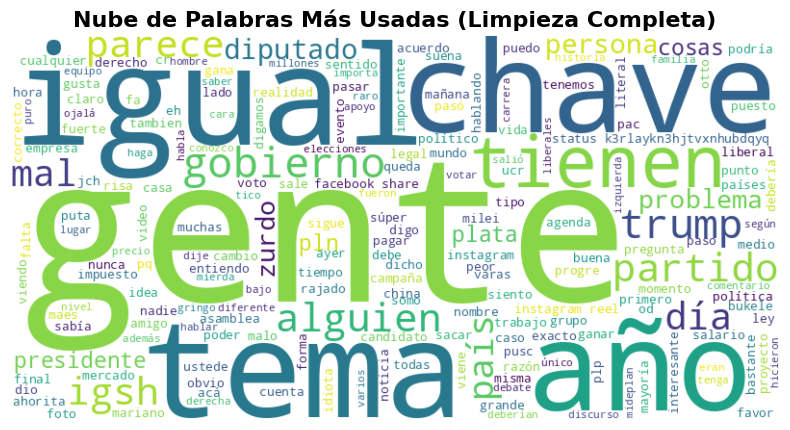

In [68]:
# Generar el texto concatenado a partir de las palabras limpias
cleaned_text = ' '.join(all_cleaned_words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(cleaned_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Más Usadas (Limpieza Completa)", fontsize=16, fontweight='bold')
plt.show()


### Ánalisis de toxicidad

In [89]:
# Palabras clave de toxicidad
toxic_words = [
    'idiota', 'mierda', 'puta', 'jueputa', 'veneco', 'zurdo', 'nicas', 'bombardear', 'matar', 'nuclear', 'satanista',
    'vago', 'comunista', 'indios', 'anarquía', 'zafarrancho', 'pintas', 'diablo', 'transgénero', 'lesbiana', 'playo'
]

# Filtrar mensajes que contengan alguna palabra clave de toxicidad
df['toxic'] = df['message'].apply(lambda x: any(word in str(x).lower() for word in toxic_words))

# Filtrar solo los mensajes tóxicos
toxic_df = df[df['toxic']]

# Guardar los mensajes tóxicos en un archivo CSV
output_path = '/mnt/data/toxic_messages.csv'
toxic_df.to_csv(output_path, index=False, encoding='utf-8')

# Mostrar el DataFrame resultante
import ace_tools as tools; tools.display_dataframe_to_user(name="Mensajes tóxicos identificados")

output_path

OSError: Cannot save file into a non-existent directory: '/mnt/data'

Archivo cargado correctamente: 97318 líneas leídas.
DataFrame creado con 80053 mensajes.
                                             message
0  [15/3/24, 4:06:00 PM] Asociación Libre - Ofici...
1  [15/3/24, 4:06:00 PM] Mariela Palma: ‎Mariela ...
2  [15/3/24, 4:19:48 PM] Asociación Libre - Ofici...
3  [15/3/24, 4:21:17 PM] Sebastian: Ah suave, gru...
4  [15/3/24, 4:22:27 PM] Carlos Perez Libre: ‎Mar...


<ipython-input-95-1753ee6d4d24>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxic_df['sender'] = toxic_df['message'].apply(extract_sender)


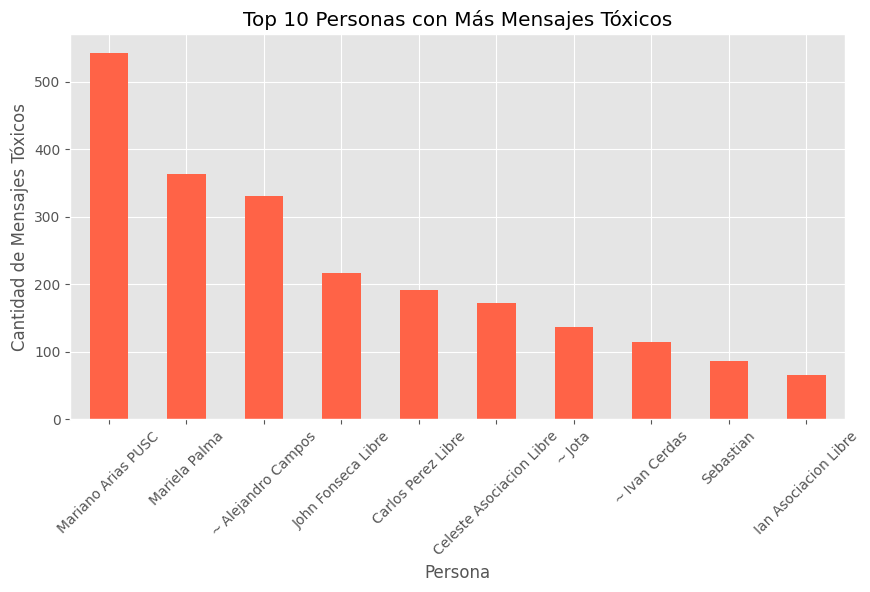

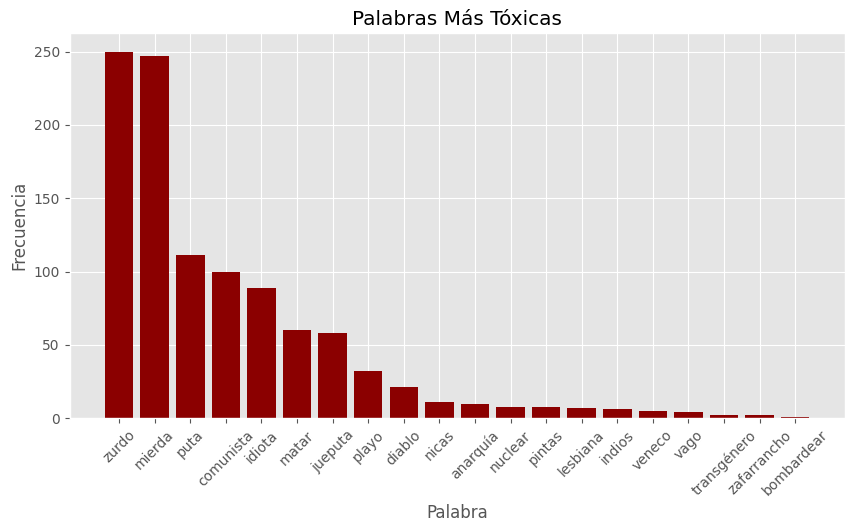

In [95]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob

# Función para cargar el archivo de chat
def cargar_chat(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
        print(f"Archivo cargado correctamente: {len(lines)} líneas leídas.")
        return lines
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return []

# Extraer mensajes y remitentes
def procesar_mensajes(lines):
    message_pattern = r'^\[\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2}\s?(AM|PM)?\] .+?: '
    messages = []
    current_message = ""
    for line in lines:
        if re.match(message_pattern, line):
            if current_message:
                messages.append(current_message.strip())
            current_message = line
        else:
            current_message += " " + line
    if current_message:
        messages.append(current_message.strip())
    df = pd.DataFrame(messages, columns=['message'])
    print(f"DataFrame creado con {len(df)} mensajes.")
    print(df.head())  # Vista previa de las primeras filas
    return df

# Palabras clave de toxicidad
toxic_words = [
    'idiota', 'mierda', 'puta', 'jueputa', 'veneco', 'zurdo', 'nicas', 'bombardear', 'matar', 'nuclear', 'satanista',
    'vago', 'comunista', 'indios', 'anarquía', 'zafarrancho', 'pintas', 'diablo', 'transgénero', 'lesbiana', 'playo'
]

# Identificación de mensajes tóxicos
def detectar_toxicidad(df):
    df['toxic'] = df['message'].apply(lambda x: any(word in str(x).lower() for word in toxic_words))
    return df[df['toxic']]

# Extraer remitente
def extract_sender(message):
    match = re.match(r'^\[\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2}\s?(AM|PM)?\] (.*?):', message)
    return match.group(2) if match else 'Desconocido'

# Análisis de toxicidad y gráfico
def analizar_toxicidad(toxic_df):
    # Verificar si el DataFrame no está vacío
    if toxic_df.empty:
        print("No se encontraron mensajes tóxicos.")
        return

    # Extraer remitente
    toxic_df['sender'] = toxic_df['message'].apply(extract_sender)

    # Calcular el top 10 de personas con más mensajes tóxicos
    top_senders = toxic_df['sender'].value_counts().head(10)

    # Contar palabras tóxicas
    all_words = " ".join(toxic_df['message']).lower().split()
    toxic_word_counts = Counter(word for word in all_words if word in toxic_words)
    top_toxic_words = dict(toxic_word_counts.most_common(20))

    # Gráfico de Top 10 Personas con Más Mensajes Tóxicos
    plt.figure(figsize=(10, 5))
    top_senders.plot(kind='bar', color='tomato')
    plt.title('Top 10 Personas con Más Mensajes Tóxicos')
    plt.xlabel('Persona')
    plt.ylabel('Cantidad de Mensajes Tóxicos')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Palabras Más Tóxicas
    plt.figure(figsize=(10, 5))
    plt.bar(top_toxic_words.keys(), top_toxic_words.values(), color='darkred')
    plt.title('Palabras Más Tóxicas')
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Ejecución del análisis
file_path = '/content/_chat-2.txt'  # Actualiza esta ruta según corresponda
lines = cargar_chat(file_path)
df = procesar_mensajes(lines)
toxic_df = detectar_toxicidad(df)
analizar_toxicidad(toxic_df)

